In [67]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearnex import patch_sklearn, config_context
patch_sklearn()
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [68]:
past = 'DataSet/Final/DataSet2017_2021.csv'
df = pd.read_csv(past, delimiter = ';',  low_memory=False, encoding='UTF-8', index_col = False)

In [69]:
df1 = df[df['ano'] == 2021]

In [115]:
#df2 = df[['uf','causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via','uso_solo', 'latitude', 'longitude']]
df2 = df[['uf','causa_acidente', 'tipo_acidente', 'classificacao_acidente', 
          'condicao_metereologica', 'tipo_pista', 
          'tracado_via','br', 'latitude', 'longitude']]

In [116]:
df2 = df2.reset_index(drop=True)
df2

,uf,causa_acidente,tipo_acidente,classificacao_acidente,condicao_metereologica,tipo_pista,tracado_via,br,latitude,longitude
0,PR,Fenomenos Da Natureza,Queda De Ocupante De Veiculo,Com Vitimas Feridas,Chuva,Simples,Reta,376,-23.098807,-52.387894
1,SC,Falta De Atencao A Conducao,Colisao Com Objeto Estatico,Sem Vitimas,Chuva,Dupla,Curva,101,-27.810100,-48.635700
2,PR,Animais Na Pista,Capotamento,Com Vitimas Feridas,Garoa/Chuvisco,Simples,Reta,153,-23.369520,309.935131
3,GO,Avarias E/Ou Desgaste Excessivo No Pneu,Tombamento,Com Vitimas Feridas,Ceu Claro,Dupla,Reta,153,-16.274737,-48.969090
4,SC,Ingestao De Alcool,Saida De Leito Carrocavel,Com Vitimas Feridas,Chuva,Simples,Nao Informado,280,-26.446752,-49.201670
...,...,...,...,...,...,...,...,...,...,...
303768,ES,Velocidade Incompativel,Tombamento,Com Vitimas Feridas,Ceu Claro,Simples,Curva,101,-20.856895,-40.876781
303769,ES,Condutor Deixou De Manter Distancia Do Veiculo...,Colisao Traseira,Com Vitimas Feridas,Ceu Claro,Simples,Reta,101,-20.657276,-40.617537
303770,SC,Velocidade Incompativel,Colisao Com Objeto,Com Vitimas Fatais,Nublado,Multipla,Nao Informado,101,-27.383995,-48.631008
303771,MG,Reacao Tardia Ou Ineficiente Do Condutor,Engavetamento,Com Vitimas Feridas,Ceu Claro,Dupla,Reta,50,-18.986906,-48.211853


In [117]:
le = preprocessing.LabelEncoder()
col = ['uf','causa_acidente', 'tipo_acidente', 'classificacao_acidente', 
          'condicao_metereologica', 'tipo_pista', 
          'tracado_via']
for i in col:
    df2[i] = le.fit_transform(df2[i])
df2

,uf,causa_acidente,tipo_acidente,classificacao_acidente,condicao_metereologica,tipo_pista,tracado_via,br,latitude,longitude
0,17,42,17,1,1,2,5,376,-23.098807,-52.387894
1,23,38,5,2,1,0,0,101,-27.810100,-48.635700
2,17,8,2,1,2,2,5,153,-23.369520,309.935131
3,8,12,19,1,0,0,5,153,-16.274737,-48.969090
4,23,46,18,1,1,2,3,280,-26.446752,-49.201670
...,...,...,...,...,...,...,...,...,...,...
303768,7,84,19,1,0,2,0,101,-20.856895,-40.876781
303769,7,15,11,1,0,2,5,101,-20.657276,-40.617537
303770,23,84,3,0,7,1,3,101,-27.383995,-48.631008
303771,10,69,14,1,0,0,5,50,-18.986906,-48.211853


In [118]:
#df2 = stats.zscore(df2)
#df2

df3 = StandardScaler().fit_transform(df2)
df3 = pd.DataFrame(df3, columns = df2.columns)
df3

,uf,causa_acidente,tipo_acidente,classificacao_acidente,condicao_metereologica,tipo_pista,tracado_via,br,latitude,longitude
0,0.272332,-0.041618,1.111037,-0.324317,-0.374721,0.938073,0.600601,1.213721,0.001887,0.001856
1,1.192299,-0.234924,-1.011524,1.599203,-0.374721,-1.158125,-1.819722,-0.894818,0.001885,0.001857
2,0.272332,-1.684721,-1.542165,-0.324317,-0.055932,0.938073,0.600601,-0.496113,0.001887,0.001906
3,-1.107619,-1.491415,1.464797,-0.324317,-0.693510,-1.158125,0.600601,-0.496113,0.001891,0.001857
4,1.192299,0.151689,1.287917,-0.324317,-0.374721,0.938073,-0.367528,0.477649,0.001885,0.001857
...,...,...,...,...,...,...,...,...,...,...
303768,-1.260947,1.988099,1.464797,-0.324317,-0.693510,0.938073,-1.819722,-0.894818,0.001888,0.001858
303769,-1.260947,-1.346435,0.049756,-0.324317,-0.693510,0.938073,0.600601,-0.894818,0.001889,0.001858
303770,1.192299,1.988099,-1.365285,-2.247838,1.538015,-0.110026,-0.367528,-0.894818,0.001885,0.001857
303771,-0.800963,1.263200,0.580396,-0.324317,-0.693510,-1.158125,0.600601,-1.285856,0.001889,0.001857


In [119]:
df3.corr(method='pearson')

,uf,causa_acidente,tipo_acidente,classificacao_acidente,condicao_metereologica,tipo_pista,tracado_via,br,latitude,longitude
uf,1.000000,0.000661,-0.021216,0.044954,0.063696,-0.090686,0.026879,0.104161,0.003136,0.003131
causa_acidente,0.000661,1.000000,0.058784,-0.020012,-0.000948,-0.007773,-0.178151,0.030152,-0.001170,-0.001162
tipo_acidente,-0.021216,0.058784,1.000000,0.104322,0.001554,-0.005347,-0.078432,-0.001712,-0.000982,-0.001013
classificacao_acidente,0.044954,-0.020012,0.104322,1.000000,0.001927,-0.069922,-0.018132,-0.013281,-0.002955,-0.002932
condicao_metereologica,0.063696,-0.000948,0.001554,0.001927,1.000000,-0.020992,-0.002017,0.006089,-0.003315,-0.003339
tipo_pista,-0.090686,-0.007773,-0.005347,-0.069922,-0.020992,1.000000,-0.063275,0.144534,-0.001772,-0.001742
tracado_via,0.026879,-0.178151,-0.078432,-0.018132,-0.002017,-0.063275,1.000000,-0.039346,0.002461,0.002445
br,0.104161,0.030152,-0.001712,-0.013281,0.006089,0.144534,-0.039346,1.000000,-0.002724,-0.002685
latitude,0.003136,-0.001170,-0.000982,-0.002955,-0.003315,-0.001772,0.002461,-0.002724,1.000000,0.999918
longitude,0.003131,-0.001162,-0.001013,-0.002932,-0.003339,-0.001742,0.002445,-0.002685,0.999918,1.000000


In [120]:
pca = PCA(df3.shape[1])
PC = pca.fit_transform(df3)
PC_comp = pd.DataFrame(PC)

Text(0, 0.5, 'Variance')

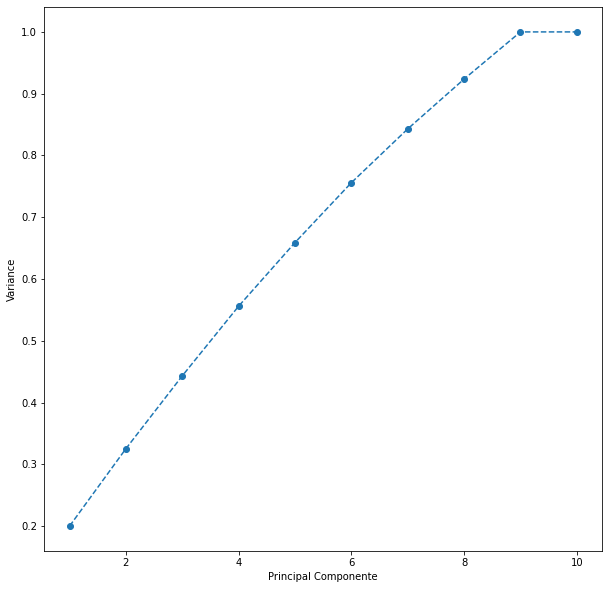

In [121]:
plt.figure(figsize = (10,10))
plt.plot(range(1,df2.shape[1]+1), pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.xlabel('Principal Componente')
plt.ylabel('Variance')


In [122]:
PC_comp.iloc[:,:7]

,0,1,2,3,4,5,6
0,-0.001199,-0.654924,0.663309,0.657706,1.178686,-0.035889,1.214370
1,0.004800,0.100284,-1.757287,0.273190,-0.449917,-1.074428,-2.060139
2,0.015221,1.610722,1.549208,0.189179,0.259329,0.200505,-0.879273
3,0.011680,1.136365,-0.533877,-1.455461,1.021632,0.210540,1.325661
4,0.000052,-1.092728,-0.004271,0.776378,0.682247,-0.223688,1.055661
...,...,...,...,...,...,...,...
303768,-0.014824,-2.841454,-0.413176,-2.072078,-0.407302,0.085899,0.374704
303769,0.008749,0.883855,1.130525,-1.574827,0.997205,0.501467,0.054197
303770,0.009982,-0.361264,0.557528,0.794311,-3.626555,0.252066,0.371679
303771,0.011036,0.220564,-0.971309,-1.694817,-0.854518,-0.611102,0.886274


In [129]:
cluster = range(4,20)
chs = []
for i in cluster:
    model = KMeans(n_clusters = i, init='k-means++', max_iter = 100, random_state = 1)
    model.fit(df3)
    chs.append(metrics.calinski_harabasz_score(df2, model.labels_))
    print('Cluster com ' + str(i))

Cluster com 4
Cluster com 5
Cluster com 6
Cluster com 7
Cluster com 8
Cluster com 9
Cluster com 10
Cluster com 11
Cluster com 12
Cluster com 13
Cluster com 14
Cluster com 15
Cluster com 16
Cluster com 17
Cluster com 18
Cluster com 19


In [128]:
wcss = []
for i in cluster:
    model = KMeans(n_clusters = i, init='k-means++', max_iter = 100, random_state = 1)
    model.fit(PC_comp.iloc[:,:7]) 
    wcss.append(model.inertia_)
    print('Cluster com ' + str(i))

Cluster com 4
Cluster com 5
Cluster com 6
Cluster com 7
Cluster com 8
Cluster com 9
Cluster com 10
Cluster com 11
Cluster com 12
Cluster com 13
Cluster com 14
Cluster com 15
Cluster com 16
Cluster com 17
Cluster com 18
Cluster com 19


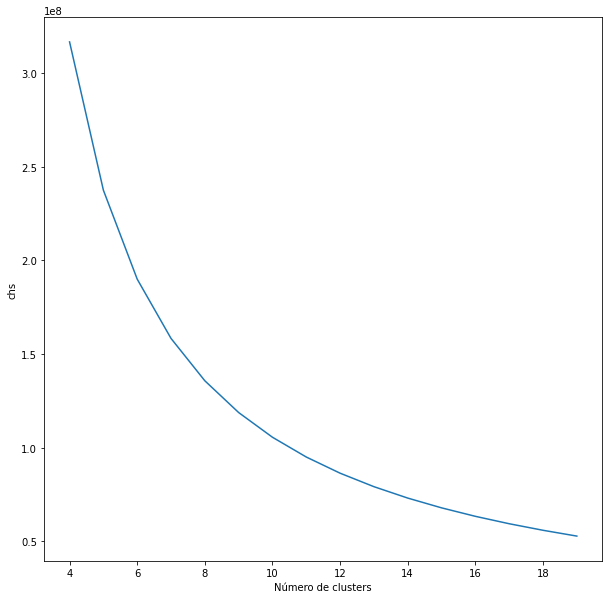

In [130]:
plt.figure(figsize= (10,10)) 
plt.plot(cluster, chs) 
plt.xlabel('Número de clusters') 
plt.ylabel('chs') 
plt.show()


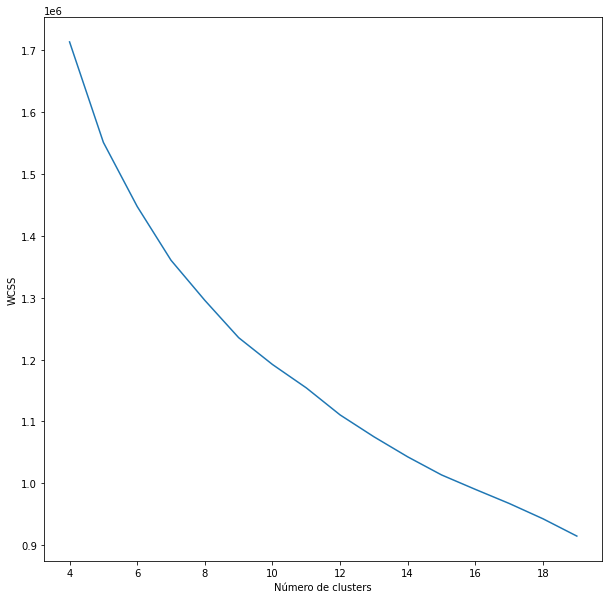

In [126]:
plt.figure(figsize= (10,10)) 
plt.plot(cluster, wcss) 
plt.xlabel('Número de clusters') 
plt.ylabel('WCSS') 
plt.show()

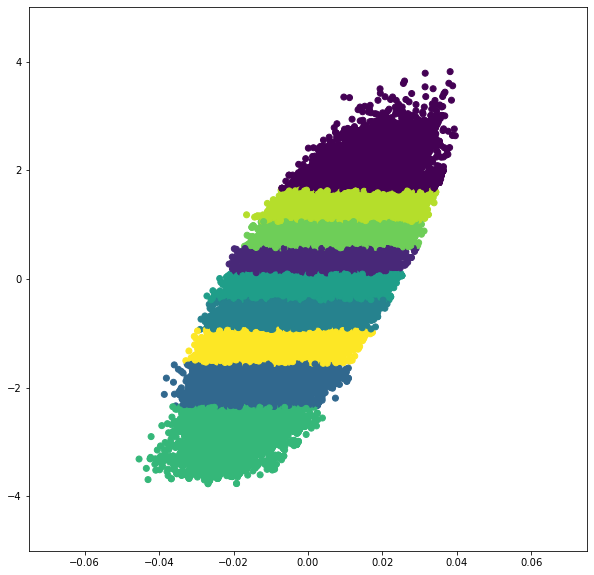

In [131]:
model = KMeans(n_clusters = 10, init='k-means++', max_iter = 100, random_state = 1)
model.fit(PC_comp.iloc[:,:2])
labels = model.predict(PC_comp.iloc[:,:2])
plt.figure(figsize= (10,10)) 
plt.scatter(PC_comp[0], PC_comp[1], c=labels)
plt.xlim([-0.075, 0.075])
plt.ylim([-5, 5])
plt.show()

In [39]:
labels

array([1, 4, 5, ..., 7, 6, 6])

In [41]:
PC_comp[0]

0        -0.003620
1        -0.005070
2         0.013804
3         0.017810
4        -0.000600
            ...   
303768   -0.026296
303769    0.002483
303770    0.016698
303771    0.003219
303772    0.014965
Name: 0, Length: 303773, dtype: float64

In [42]:
PC_comp[1]

0        -0.844129
1        -0.399651
2         0.618265
3         1.106038
4        -1.190272
            ...   
303768   -3.230777
303769   -0.437416
303770    0.788342
303771   -0.618517
303772    0.298289
Name: 1, Length: 303773, dtype: float64

In [ ]:
clustering2 = AgglomerativeClustering().fit(df2)


In [ ]:
gm = GaussianMixture(n_components=12, random_state=0).fit(df2)

In [20]:
clustering1 = DBSCAN(eps=12, min_samples=9).fit(df2)